In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip install gdown  # Install gdown if not already installed
!gdown "https://drive.google.com/uc?id=1CjhNulNquoA8gWQtmHD83ib5t8lGBGC1"


Downloading...
From (original): https://drive.google.com/uc?id=1CjhNulNquoA8gWQtmHD83ib5t8lGBGC1
From (redirected): https://drive.google.com/uc?id=1CjhNulNquoA8gWQtmHD83ib5t8lGBGC1&confirm=t&uuid=c6f78b83-659d-4b07-83a2-d2888ca4a8b4
To: /content/animal_data.zip
100% 38.9M/38.9M [00:01<00:00, 32.6MB/s]


In [5]:
!unzip -o animal_data.zip -d ./unzipped_folder

!ls ./unzipped_folder


Archive:  animal_data.zip
   creating: ./unzipped_folder/animal_data/
  inflating: ./unzipped_folder/__MACOSX/._animal_data  
   creating: ./unzipped_folder/animal_data/Cat/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Cat  
   creating: ./unzipped_folder/animal_data/Dog/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Dog  
   creating: ./unzipped_folder/animal_data/Dolphin/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Dolphin  
   creating: ./unzipped_folder/animal_data/Giraffe/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Giraffe  
   creating: ./unzipped_folder/animal_data/Bear/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Bear  
   creating: ./unzipped_folder/animal_data/Zebra/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Zebra  
   creating: ./unzipped_folder/animal_data/Panda/
  inflating: ./unzipped_folder/__MACOSX/animal_data/._Panda  
   creating: ./unzipped_folder/animal_data/Tiger/
  inflating: ./unzipped_folder/__MACOSX/an

In [6]:
!ls ./unzipped_folder

animal_data  __MACOSX


In [15]:
len(os.listdir('./unzipped_folder/animal_data'))

15

In [16]:
import os

data = []
dir_path = "./unzipped_folder/animal_data"
for folder_name in os.listdir(dir_path):
  folder_path = os.path.join(dir_path, folder_name)
  if os.path.isdir(folder_path):
    for image_name in os.listdir(folder_path):
      if image_name.lower().endswith(('jpeg','jpg','png')):
        image_path = os.path.join(folder_path,image_name)
        label = folder_name
        data.append({'label':label,'image_path':image_path})

In [17]:
data[0]['label']

'Cow'

In [18]:
data[0]['image_path']

'./unzipped_folder/animal_data/Cow/Cow_18_2.jpg'

In [19]:
len(data)

1944

In [20]:
df = pd.DataFrame(data)

In [21]:
df.head()

,label,image_path
0,Cow,./unzipped_folder/animal_data/Cow/Cow_18_2.jpg
1,Cow,./unzipped_folder/animal_data/Cow/Cow_28_1.jpg
2,Cow,./unzipped_folder/animal_data/Cow/Cow_14_1.jpg
3,Cow,./unzipped_folder/animal_data/Cow/Cow_25.jpeg
4,Cow,./unzipped_folder/animal_data/Cow/Cow_13.jpg


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       1944 non-null   object
 1   image_path  1944 non-null   object
dtypes: object(2)
memory usage: 30.5+ KB


In [25]:
df.describe()

,label,image_path
count,1944,1944
unique,15,1944
top,Bird,./unzipped_folder/animal_data/Cow/Cow_18_2.jpg
freq,137,1


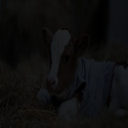

In [31]:
def resize_img(img_path):
    img = Image.open(image_path).resize((128,128))
    return img


images_resized = []

for idx,item in df.iterrows():
  image_path = item['image_path']
  label = item['label']
  img = resize_img(image_path)
  if img is not None:
    images_resized.append({'label':label,'image':img})

images_resized[0]['image']


In [33]:
img1 = images_resized[0]['image']

img1.size

(128, 128)

In [34]:
def normalize_image(img):
    img_arr = np.array(img)
    img_nor = img_arr/255.0
    return img_nor

img_preprocessed = []

for image in images_resized:
    label = image['label']
    img = image['image']
    img_norm = normalize_image(img)
    img_preprocessed.append({'label': label, 'image': img_norm})


In [36]:
img_preprocessed[0]

{'label': 'Cow',
 'image': array([[[0.03529412, 0.05490196, 0.06666667],
         [0.03921569, 0.04705882, 0.05490196],
         [0.03921569, 0.03921569, 0.03921569],
         ...,
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ]],
 
        [[0.03529412, 0.05490196, 0.06666667],
         [0.03921569, 0.04705882, 0.05490196],
         [0.03921569, 0.04313725, 0.03921569],
         ...,
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ]],
 
        [[0.04313725, 0.05882353, 0.07058824],
         [0.04313725, 0.05098039, 0.05882353],
         [0.04313725, 0.04313725, 0.04313725],
         ...,
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ]],
 
        ...,
 
        [[0.08627451, 0.08627451, 0.07843137],
         [0.058

In [37]:
from sklearn.preprocessing import LabelEncoder

labels = [item['label'] for item in img_preprocessed]
labelencoder = LabelEncoder()
labels_encoded = labelencoder.fit_transform(labels)

img_encoded = []

for idx,item in enumerate(img_preprocessed):
    img = item['image']
    label = labels_encoded[idx]
    img_encoded.append({'label':label,'image':img})

print('Mapping: ',dict(enumerate(labelencoder.classes_)))

Mapping:  {0: 'Bear', 1: 'Bird', 2: 'Cat', 3: 'Cow', 4: 'Deer', 5: 'Dog', 6: 'Dolphin', 7: 'Elephant', 8: 'Giraffe', 9: 'Horse', 10: 'Kangaroo', 11: 'Lion', 12: 'Panda', 13: 'Tiger', 14: 'Zebra'}


In [38]:
img_encoded[0]

{'label': 3,
 'image': array([[[0.03529412, 0.05490196, 0.06666667],
         [0.03921569, 0.04705882, 0.05490196],
         [0.03921569, 0.03921569, 0.03921569],
         ...,
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ]],
 
        [[0.03529412, 0.05490196, 0.06666667],
         [0.03921569, 0.04705882, 0.05490196],
         [0.03921569, 0.04313725, 0.03921569],
         ...,
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ]],
 
        [[0.04313725, 0.05882353, 0.07058824],
         [0.04313725, 0.05098039, 0.05882353],
         [0.04313725, 0.04313725, 0.04313725],
         ...,
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ],
         [0.04705882, 0.0627451 , 0.0745098 ]],
 
        ...,
 
        [[0.08627451, 0.08627451, 0.07843137],
         [0.0588235

In [39]:
from sklearn.model_selection import train_test_split

X = [item['image'] for item in img_encoded]
y = [item['label'] for item in img_encoded]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

len(X_train)

1555

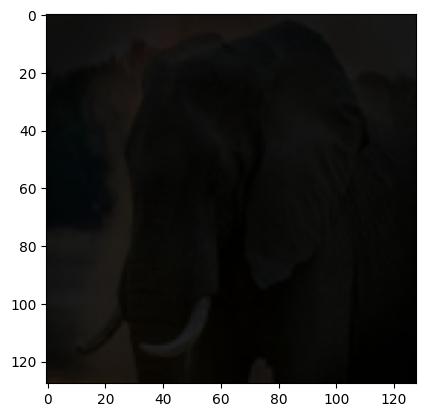

In [40]:
plt.imshow(X_train[0])

Using Transfer Learning:

In [57]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(labelencoder.classes_), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,589,775 (9.88 MB)

 Trainable params: 331,791 (1.27 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [58]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 353ms/step - accuracy: 0.3470 - loss: 2.2860
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 348ms/step - accuracy: 0.7626 - loss: 0.7906
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 349ms/step - accuracy: 0.8423 - loss: 0.5129
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 365ms/step - accuracy: 0.8786 - loss: 0.3930
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 354ms/step - accuracy: 0.8936 - loss: 0.3733
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 355ms/step - accuracy: 0.9167 - loss: 0.2822
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 360ms/step - accuracy: 0.9191 - loss: 0.2620
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 352ms/step - accuracy: 0.9481 - loss: 0.1886
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 411ms/step - accuracy: 0.9373 - loss: 0.2039
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 365ms/step - accuracy: 0.9629 - loss: 0.1458


In [59]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 416ms/step - accuracy: 0.9112 - loss: 0.2884
Test Accuracy: 0.8791773915290833


In [61]:
model_test_predictions = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 440ms/step


In [62]:
predictions = model_test_predictions
predictions[0]

array([1.20691358e-04, 4.40479965e-07, 2.07518298e-07, 1.17618154e-04,
       1.01118655e-06, 6.07157858e-07, 5.78850639e-08, 9.99679565e-01,
       1.07214819e-05, 2.06551431e-05, 1.01632158e-05, 3.57118006e-05,
       6.51478501e-07, 8.56592486e-09, 1.94898280e-06], dtype=float32)

In [63]:
np.argmax(predictions[0])

7

In [47]:
y_train[0]

7

In [64]:
class_mapping = {
    0: 'Bear', 1: 'Bird', 2: 'Cat', 3: 'Cow', 4: 'Deer', 5: 'Dog', 6: 'Dolphin',
    7: 'Elephant', 8: 'Giraffe', 9: 'Horse', 10: 'Kangaroo', 11: 'Lion', 12: 'Panda',
    13: 'Tiger', 14: 'Zebra'
}

In [65]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Please upload an image.


Saving gettyimages-1005345604-612x612.jpg to gettyimages-1005345604-612x612 (1).jpg


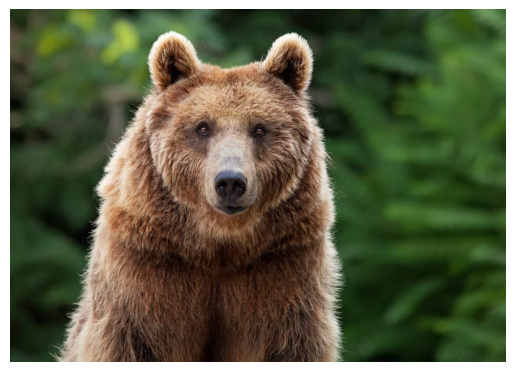

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The model predicts that the image is: Bear


In [66]:
def preprocess_image(image_path):

    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image():

    print("Please upload an image.")
    uploaded = files.upload()
    for image_name in uploaded.keys():
        img_path = image_name
        img = load_img(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        preprocessed_img = preprocess_image(img_path)
        prediction = model.predict(preprocessed_img)
        predicted_class = np.argmax(prediction)
        class_label = class_mapping[predicted_class]

        print(f"The model predicts that the image is: {class_label}")


predict_image()

Please upload an image.


Saving istockphoto-118205813-612x612.jpg to istockphoto-118205813-612x612 (1).jpg


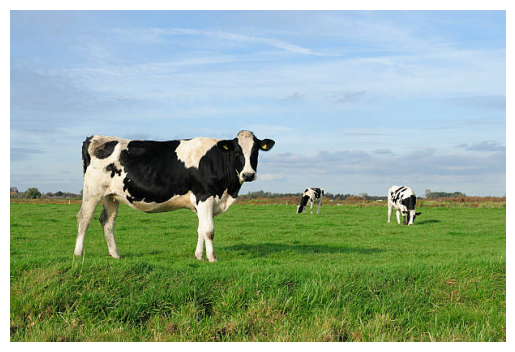

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
The model predicts that the image is: Cow


In [67]:
predict_image()